In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.2f' % x)
#pd.options.display.float_format = '{:.3f}'.format

## Kaggle ****

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.25,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.28,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.92,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.10,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.05,NaN,S


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### E.D.A

In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

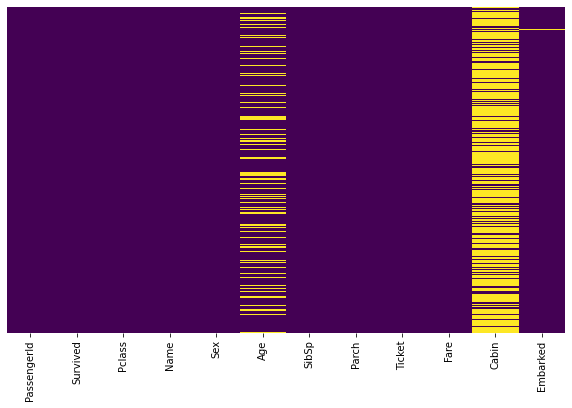

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")      # görsel olarak missing valueları görebiliriz :

In [8]:
df["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

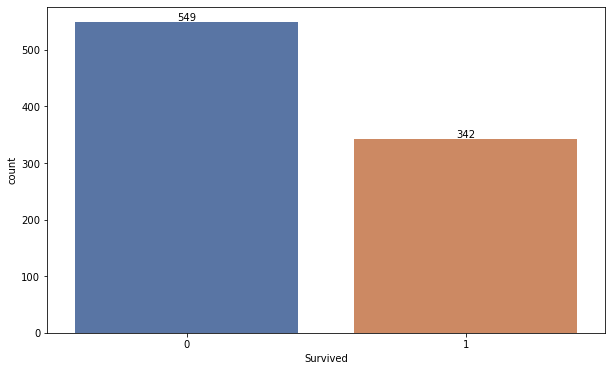

In [9]:
ax = sns.countplot(df["Survived"],data=df,palette="deep")
for container in ax.containers:
    ax.bar_label(container)

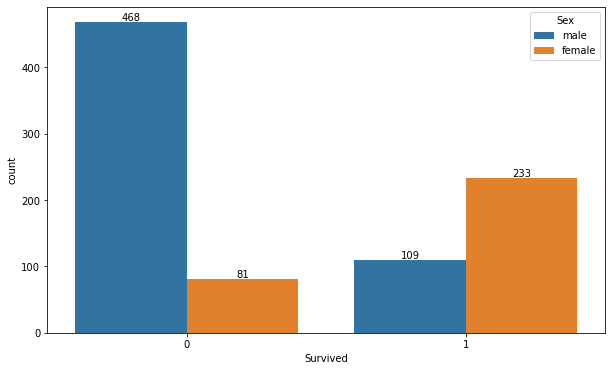

In [10]:
ax = sns.countplot(x=df["Survived"],hue="Sex",data=df)
for container in ax.containers:
    ax.bar_label(container)

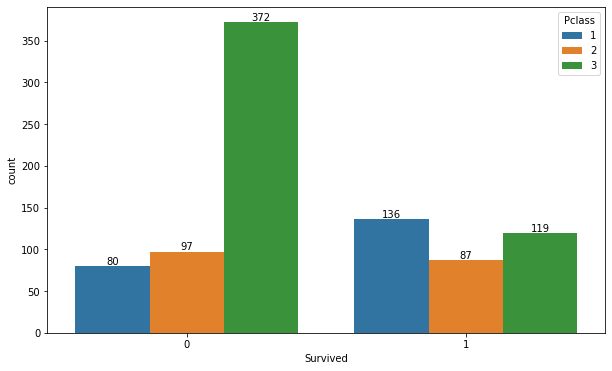

In [11]:
ax = sns.countplot(x=df["Survived"],hue="Pclass",data=df)
for container in ax.containers:
    ax.bar_label(container)

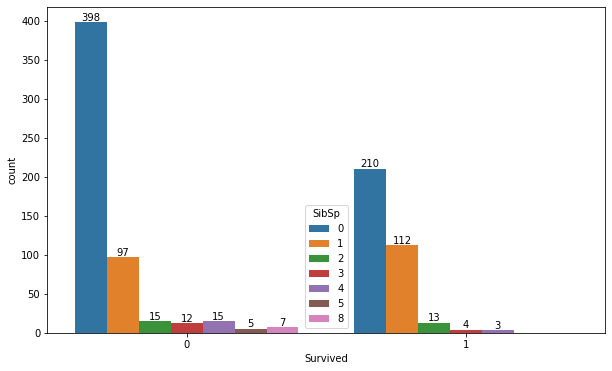

In [12]:
ax = sns.countplot(x=df["Survived"],hue="SibSp",data=df)
for container in ax.containers:
    ax.bar_label(container)

In [13]:
df.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.00,-0.01,-0.04,0.04,-0.06,-0.00,0.01
Survived,-0.01,1.00,-0.34,-0.08,-0.04,0.08,0.26
Pclass,-0.04,-0.34,1.00,-0.37,0.08,0.02,-0.55
Age,0.04,-0.08,-0.37,1.00,-0.31,-0.19,0.10
SibSp,-0.06,-0.04,0.08,-0.31,1.00,0.41,0.16
Parch,-0.00,0.08,0.02,-0.19,0.41,1.00,0.22
Fare,0.01,0.26,-0.55,0.10,0.16,0.22,1.00


<AxesSubplot:>

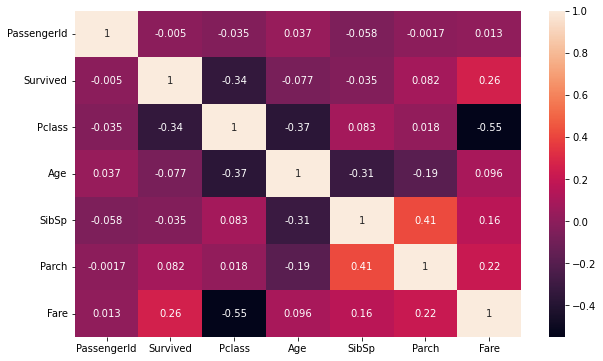

In [14]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

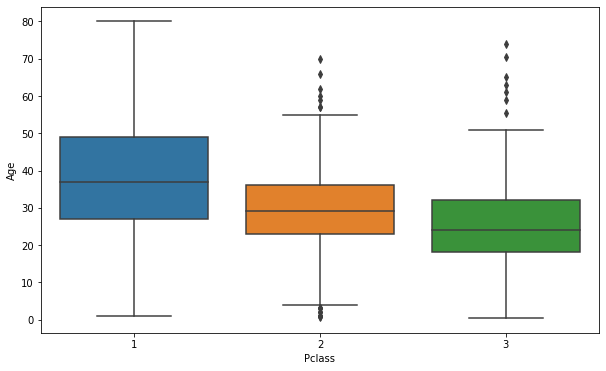

In [15]:
sns.boxplot(x="Pclass",y="Age",data=df)

### --------------> yaş arttıkça class iyileşmiş.

In [16]:
df["Age"].value_counts(dropna=False)

NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 89, dtype: int64

### missing valueları doldurma :

In [17]:
def add_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        return int(train[train["Pclass"] == Pclass]["Age"].mean())
    else:
        return Age
    

In [18]:
df["Age"] = df[["Age","Pclass"]].apply(impute_age,axis=1)

<AxesSubplot:>

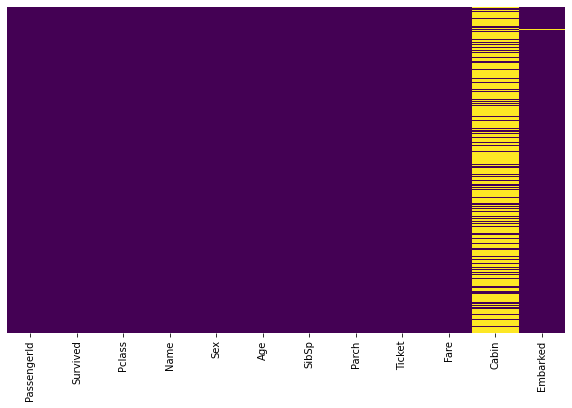

In [19]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")      # görsel olarak missing valueları görebiliriz :

In [20]:
df["Age"].value_counts(dropna=False)

24.00    166
37.00     36
29.00     31
22.00     27
18.00     26
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: Age, Length: 88, dtype: int64

In [21]:
df.drop("Cabin",axis=1,inplace=True)

In [22]:
df.sample(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.00,0,5,382652,29.12,Q
675,676,0,3,"Edvardsson, Mr. Gustaf Hjalmar",male,18.00,0,0,349912,7.78,S


In [23]:
df.dropna(inplace=True)        # --------> embarked'daki nan olan satırları da atalım .

In [24]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [26]:
sex = pd.get_dummies(df["Sex"],drop_first=True)
embark = pd.get_dummies(df["Embarked"],drop_first=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [28]:
df.drop(["Sex","Embarked","Name","Ticket"],axis=1,inplace=True)

In [29]:
df = pd.concat([df,sex,embark],axis=1)

In [30]:
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.00,1,0,7.25,1,0,1
1,2,1,1,38.00,1,0,71.28,0,0,0
2,3,1,3,26.00,0,0,7.92,0,0,1
3,4,1,1,35.00,1,0,53.10,0,0,1
4,5,0,3,35.00,0,0,8.05,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,27.00,0,0,13.00,1,0,1
887,888,1,1,19.00,0,0,30.00,0,0,1
888,889,0,3,24.00,1,2,23.45,0,0,1
889,890,1,1,26.00,0,0,30.00,1,0,0


## Model Building

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [32]:
## train verilmişse Kaggle'da mesela bu train_test_split yapmamıza gerek yok değil mi ? 

In [33]:
X = df.drop("Survived",axis=1)
y = df["Survived"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
log_model = LogisticRegression()

In [37]:
log_model

LogisticRegression()

In [38]:
log_model.fit(X_train,y_train)

LogisticRegression()

In [39]:
y_pred = log_model.predict(X_test)

In [40]:
y_pred

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)

In [41]:
from sklearn.model_selection import cross_validate

In [42]:
model = LogisticRegression()
scores = cross_validate(model, X_train, y_train, scoring = ["f1",'precision','recall'], cv = 5)

In [43]:
pd.DataFrame(scores, index = range(1,6))      # index ----> k-fold (cv=5)

,fit_time,score_time,test_f1,test_precision,test_recall
1,0.02,0.01,0.73,0.76,0.71
2,0.02,0.01,0.73,0.80,0.67
3,0.02,0.00,0.69,0.72,0.65
4,0.01,0.00,0.67,0.73,0.63
5,0.01,0.00,0.69,0.75,0.65


In [44]:
scores = pd.DataFrame(scores, index=range(1,6))
scores.iloc[:, 2:].mean()   

test_f1          0.70
test_precision   0.75
test_recall      0.66
dtype: float64

In [45]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

In [46]:
accuracy_score(y_test,y_pred)

0.7937219730941704

## Model Performance on Classification Tasks

In [47]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [48]:
confusion_matrix(y_test,y_pred)

array([[120,  21],
       [ 25,  57]], dtype=int64)

In [49]:
confusion_matrix(y_pred,y_test)

array([[120,  25],
       [ 21,  57]], dtype=int64)

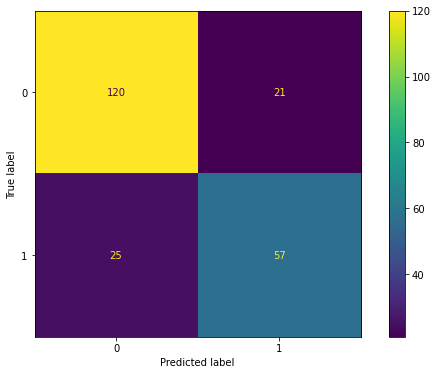

In [50]:
plot_confusion_matrix(log_model, X_test, y_test);

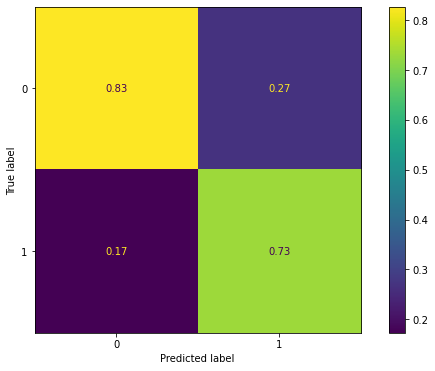

In [51]:
plot_confusion_matrix(log_model, X_test, y_test, normalize='pred');

In [52]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.85      0.84       141
           1       0.73      0.70      0.71        82

    accuracy                           0.79       223
   macro avg       0.78      0.77      0.78       223
weighted avg       0.79      0.79      0.79       223



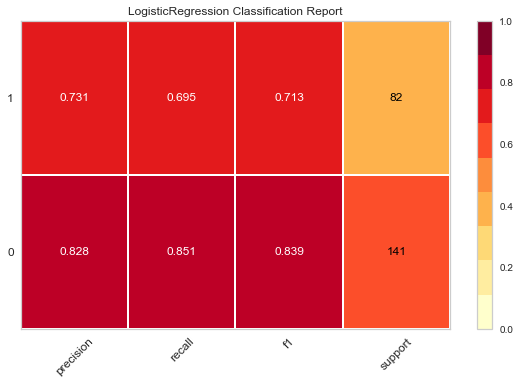

<AxesSubplot:title={'center':'LogisticRegression Classification Report'}>

In [53]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(log_model,support=True)

visualizer.fit(X_train, y_train)        # Fit the visualizer and the model
visualizer.score(X_test, y_test)        # Evaluate the model on the test data
visualizer.show()                       # Finalize and show the figure

In [54]:
y_test.shape          # --------> support

(223,)